In [16]:
# =========================================================
# 🧠 CRIME PREDICTION PROJECT — EDA NOTEBOOK
# File: notebooks/eda.ipynb
# =========================================================

# STEP 1️⃣ — Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# To display all columns
pd.set_option('display.max_columns', None)

# STEP 2️⃣ — Load the dataset
data_path = "../data/crime_dataset_india.csv"
df = pd.read_csv(data_path)

print("✅ Dataset loaded successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()


✅ Dataset loaded successfully!
Rows: 40160, Columns: 14


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [17]:
# STEP 3️⃣ — Basic info and missing values
print("📊 Dataset Info:")
df.info()

print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB

🔍 Missing Values:
Report Number             0
Date Repo

In [18]:
# STEP 4️⃣ — Handle missing or duplicate values

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill or drop missing values (choose based on your dataset)
df = df.fillna(df.mean(numeric_only=True))

print("✅ Cleaned missing and duplicate values.")


✅ Cleaned missing and duplicate values.


In [19]:
# STEP 5️⃣ — Statistical overview
df.describe()


,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


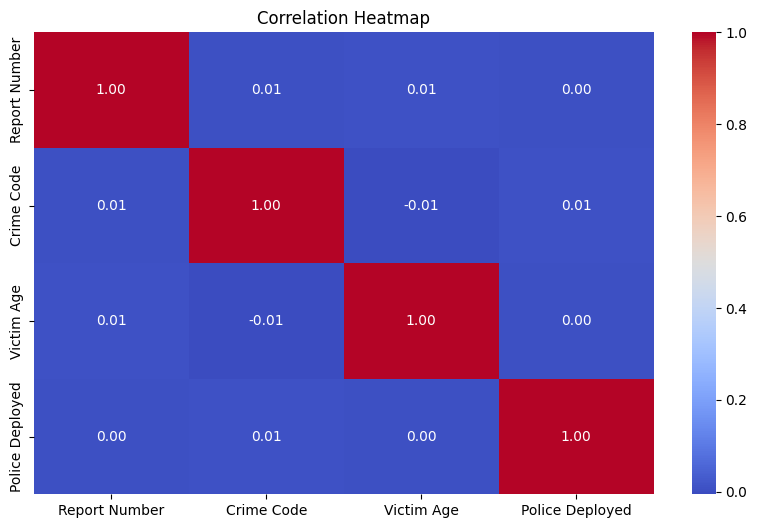

In [20]:
# STEP 6️⃣ — Data visualization

# Crime counts by state (if applicable)
if 'State/UT' in df.columns:
    plt.figure(figsize=(12,5))
    sns.countplot(y='State/UT', data=df, order=df['State/UT'].value_counts().index)
    plt.title("Number of Crime Records by State/UT")
    plt.xlabel("Count")
    plt.ylabel("State/UT")
    plt.show()

# Correlation heatmap (for numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [21]:
# STEP 7️⃣ — Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print("✅ Encoded categorical columns.")
df.head()


✅ Encoded categorical columns.


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,836,0,0,1,576,11,16,1,0,3,13,0,16011
1,2,2,1,1,4,128,10,37,1,5,1,9,0,16011
2,3,838,2,3,15,271,13,48,0,0,1,15,0,16011
3,4,0,3,4,21,170,2,49,0,2,1,1,1,14808
4,5,3,4,5,21,421,19,30,0,4,1,18,1,3645


In [22]:
import pandas as pd
df = pd.read_csv("C:/crime_prediction/data/crime_dataset_india.csv")
print(df["Victim Gender"].unique())


['M' 'F' 'X']


In [23]:
print(df["Weapon Used"].unique())


['Blunt Object' 'Poison' 'Firearm' 'Other' 'Knife' 'Explosives' nan]


In [24]:
# STEP 8️⃣ — Save cleaned dataset
output_path = "../data/cleaned_crime.csv"
df.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved successfully to: {output_path}")


✅ Cleaned dataset saved successfully to: ../data/cleaned_crime.csv
